In [47]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [48]:
import numpy as np
import pandas as pd

In [49]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [50]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [51]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [52]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [53]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [54]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [55]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [56]:
#Get a list of the column names and types for measurrement
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [74]:
# How many dates do we have
session.query(func.count(measurement.date)).all()

#What is the ealiest date
session.query(measurement.date).order_by(measurement.date).first()

#What is the latest date 
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23')

In [75]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(measurement.date).filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()

[('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-02'

In [76]:
# Design a query to retrieve the last 12 months of precipitation data.
sel = [measurement.date, 
       measurement.prcp]
oneYear_precipitation = session.query(*sel).\
    filter(measurement.date > '2016-08-23').all()
oneYear_precipitation

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [ ]:
#Plot the results
df = pd.DataFrame(oneYear_precipitation)
df.set_index('date', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

In [ ]:
# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, 
       measurement.prcp]
oneYear_precipitation = session.query(*sel).\
    filter(measurement.date > '2016-08-23').all()
oneYear_precipitation

In [ ]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(oneYear_precipitation, columns = ['date','prcp'])
df.set_index('date')
df.head()

In [ ]:
# Sort the dataframe by date
df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar()
plt.tight_layout()
plt.show()


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

In [64]:
# Design a query to show how many stations are available in this dataset?
station = session.query(measurement) 
for ii in station:
    print(measurement.station)
    
#station = session.query(measurement).filter_by( station ='').count()
#station = session.query(measurement.station).count()
#print(station)


19550


In [73]:
# What are the most active stations? (i.e. what stations have the most rows)?
USC00519397 = session.query(measurement).filter_by(station = "USC00519397").count()
print(USC00519397)

USC00513117 = session.query(measurement).filter_by(station = "USC00513117").count()
print(USC00513117)
USC00514830 = session.query(measurement).filter_by(station = "USC00514830").count()
print(USC00514830)
USC00517948 = session.query(measurement).filter_by(station = "USC00517948").count()
print(USC00517948)
USC00518838 = session.query(measurement).filter_by(station = "USC00518838").count()
print(USC00518838)
USC00519523 = session.query(measurement).filter_by(station = "USC00519523").count()
print(USC00519523)
USC00519281 = session.query(measurement).filter_by(station = "USC00519281").count()
print(USC00519281)
USC00511918 = session.query(measurement).filter_by(station = "USC00511918").count()
print(USC00511918)
USC00516128 = session.query(measurement).filter_by(station = "USC00516128").count()
print(USC00516128)



2724
2709
2202
1372
511
2669
2772
1979
2612


In [72]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
lowest = session.query(measurement).filter_by(station = "USC00519397").order_by(measurement.prcp.desc()).first()
print(lowest)
# highest temperature recorded, and average temperature of the most active station?
highest = session.query(measurement).filter_by(station = "USC00519397").order_by(measurement.prcp).first()
print(highest)

In [77]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel2 = [measurement.tobs]

largestStation = session.query(*sel2).filter_by(station = "USC00519281").\
    filter(measurement.date > '2016-08-23').all()
largestStation


[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

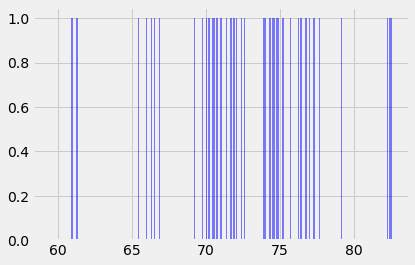

In [81]:
# Create a histogram 
plt.hist(largestStation,5, facecolor='blue', alpha=0.5)
plt.show()